**Iteration 1: Vanilla Network**

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


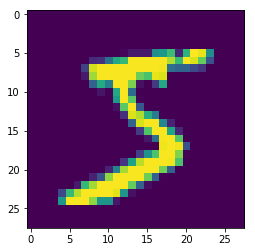

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 
model.add(Convolution2D(64, 3, 3, activation='relu')) # 24

model.add(Convolution2D(32, 1, 1, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(64, 3, 3, activation='relu')) # 10
model.add(Convolution2D(128, 3, 3, activation='relu')) # 8
model.add(Convolution2D(256, 3, 3, activation='relu')) # 6
model.add(Convolution2D(512, 3, 3, activation='relu')) # 4

model.add(Convolution2D(10, 1, activation='relu')) # 4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 256)         295168    
__________

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1725 - acc: 0.9459
Epoch 2/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0499 - acc: 0.9844
Epoch 3/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0379 - acc: 0.9881
Epoch 4/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0306 - acc: 0.9909
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0267 - acc: 0.9916
Epoch 6/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0208 - acc: 0.9932
Epoch 7/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0191 - acc: 0.9940
Epoch 8/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0152 - acc: 0.9952
Epoch 9/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0144 - acc: 0.9955
Epoch 10/20
60000/60000 [==============================] - 10s 169us/step - loss: 

In [19]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)

Epoch 1/20
 1024/60000 [..............................] - ETA: 10s - loss: 0.0059 - acc: 0.9980

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 10s 168us/step - loss: 0.0059 - acc: 0.9982
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0087 - acc: 0.9974
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0071 - acc: 0.9980
Epoch 4/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0055 - acc: 0.9986
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0061 - acc: 0.9984
Epoch 6/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0059 - acc: 0.9984
Epoch 7/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0085 - acc: 0.9977
Epoch 8/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.0046 - acc: 0.9988
Epoch 9/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0070 - acc: 0.9984
Epoch 10/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0064 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [21]:
print(score)

[0.05416861307784409, 0.9914]


In [0]:
y_pred = model.predict(X_test)

In [23]:
print(y_pred[:9])
print(y_test[:9])

[[3.0917173e-38 2.6289064e-30 2.0187572e-19 2.2058244e-19 7.1666076e-12
  2.5813980e-20 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.2577791e-13]
 [5.2523247e-18 8.2619549e-20 1.0000000e+00 6.8002291e-18 1.7358401e-21
  2.6803393e-29 7.3104052e-17 1.5228167e-17 2.2446869e-17 0.0000000e+00]
 [5.4923766e-16 1.0000000e+00 4.8217266e-14 3.5372213e-12 7.6455437e-14
  9.2056329e-20 6.3082170e-17 1.2184150e-13 3.5149834e-14 1.3844566e-19]
 [1.0000000e+00 3.8404360e-28 1.9694849e-16 6.5302620e-20 6.6299094e-28
  2.1667226e-16 1.4462184e-18 6.6782248e-17 2.0921744e-17 4.8576616e-18]
 [3.0344283e-16 5.2881385e-15 1.6620386e-23 1.8833805e-22 1.0000000e+00
  4.5302422e-17 1.8541163e-16 4.3608317e-17 3.0455294e-10 3.2461154e-09]
 [2.5653207e-26 1.0000000e+00 5.6329177e-20 8.3579371e-21 1.5278226e-22
  1.2292589e-26 6.6594460e-26 1.2250994e-15 1.4700124e-19 6.1046895e-26]
 [4.7630156e-18 3.8942294e-10 3.3077079e-21 4.4968217e-25 1.0000000e+00
  2.0956678e-22 4.4411638e-24 8.7089773e-11 8.2968402e-16 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

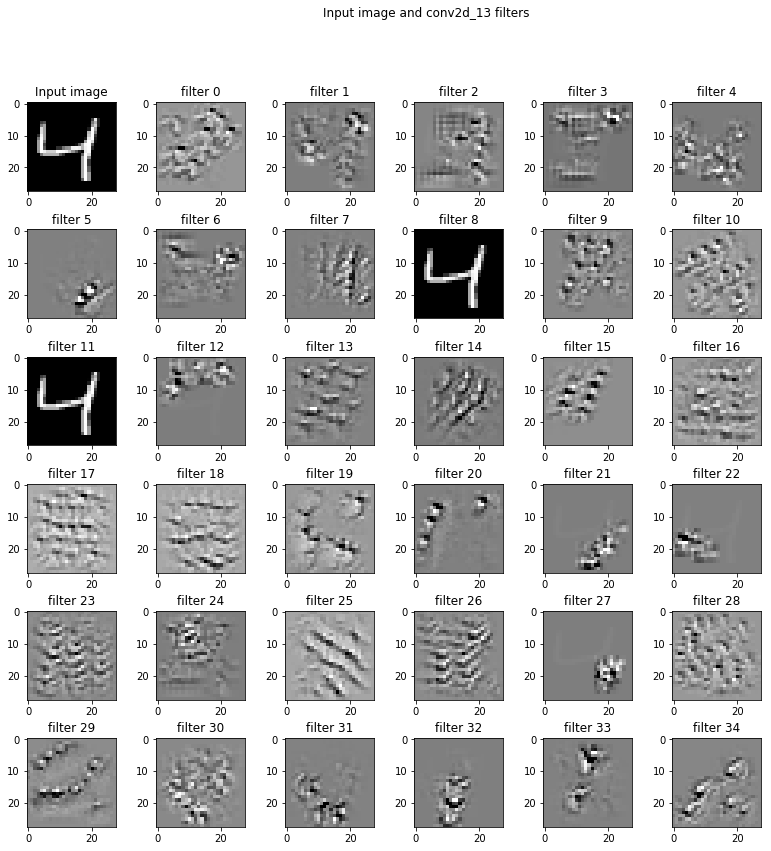

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_13'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()